In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

# Lab 6
## Hypothesis testing

### Task 1: Wald and permutation tests

In 1861, 10 essays appeared in the New Orleans Daily Crescent. They
were signed “Quintus Curtius Snodgrass” and some people suspected
they were actually written by Mark Twain. To investigate this, we will
consider the proportion of three letter words found in an author’s work.
From eight Twain essays we have:

In [2]:
X = np.array([.225, .262, .217, .240, .230, .229, .235, .217])

From 10 Snodgrass essays we have:

In [3]:
Y = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

1. Perform a Wald test for equality of the means. Report the $p$-value and a 95% confidence
interval for the difference of means. What do you conclude?

2. Now use a permutation test to avoid the use of large sample methods.
What is your conclusion?

Wald's criterion: W: 3.7035535443338206, p-value: 0.00021260028225810121


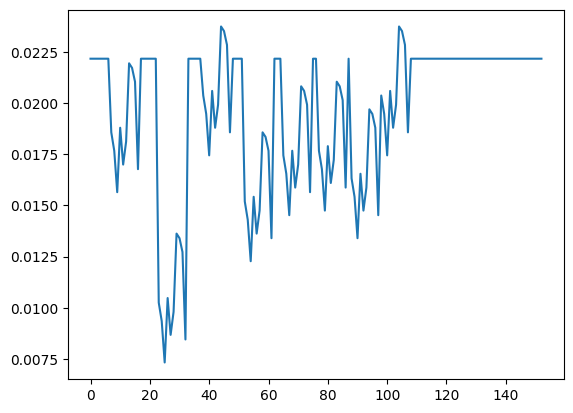

In [4]:
# Wald's criterion
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X_var = np.var(X, ddof=1)
Y_var = np.var(Y, ddof=1)

se = np.sqrt(X_var/len(X) + Y_var/len(Y))
W = (X_mean - Y_mean) / se

# two-side p-value
p = 2 * scipy.stats.norm.cdf(-abs(W))
print(f'Wald\'s criterion: W: {W}, p-value: {p}')

# permutation test
XY = np.concatenate([X, Y])
per_list = []
for i in range(len(XY)):
    for j in range(i + 1, len(XY)):
        XY_ = XY.copy()
        XY_[i], XY_[j] = XY_[j], XY_[i]
        XY_1 = XY_[:len(X)] # X
        XY_2 = XY_[len(X):]
        XY_1_mean = np.mean(XY_1)
        XY_2_mean = np.mean(XY_2)
        per_list.append(XY_1_mean - XY_2_mean) # Minghao to copliot: you are amazing!

per_list = np.array(per_list) 

fig, ax = plt.subplots(1, 1)
ax.plot(per_list)
        

# conclusion


### Task 2: Multiple comparisons

A randomized, double-blind experiment was conducted to assess the
effectiveness of several drugs for reducing postoperative nausea. The
data are as follows:

In [5]:
df1 = pd.DataFrame({'Drug': ['Placebo', 'Chlorpromazine', 'Dimenhydrinate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
                    'Number of Patients': [80, 75, 85, 67, 85],
                    'Incidence of Nausea': [45, 26, 52, 35, 33]})
df1

,Drug,Number of Patients,Incidence of Nausea
0,Placebo,80,45
1,Chlorpromazine,75,26
2,Dimenhydrinate,85,52
3,Pentobarbital (100 mg),67,35
4,Pentobarbital (150 mg),85,33


1. Test each drug versus the placebo at the 5 per cent level. Also, report the estimated odds–ratios. Summarize your findings. 
2. Use the Bonferroni method for multiple testing.
3. Compare the results of testing with and without correction for multiple testing.

*Hint*. Use simple $H_0$: "$p = p_0$".